In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Library for getting mutual info
from sklearn.feature_selection import mutual_info_regression

# for doing randomized or grid search of best estimation in model parameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for scalling the data
from sklearn.preprocessing import MinMaxScaler

# for calculating all scores
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score, r2_score

# all different models used here
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# to plot confusion matrix of predicted and Y_test value
from sklearn.metrics import confusion_matrix

# to ignore warning
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
dataFrame = pd.read_csv("Titanic.csv", delimiter=',')

In [10]:
dataFrame.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [7]:
dataFrame.columns = ['id', 'name', 'class', 'age', 'sex', 'survived', 'sexCode']

In [8]:
# should be 1313
len(dataFrame)

1313

In [13]:
dataFrame.dtypes

PassengerID      int64
Name            object
PClass          object
Age            float64
Sex             object
Survived         int64
SexCode          int64
dtype: object

PassengerID      0
Name             0
PClass           0
Age            557
Sex              0
Survived         0
SexCode          0
dtype: int64
PassengerID    1313
Name           1310
PClass            4
Age              75
Sex               2
Survived          2
SexCode           2
dtype: int64


,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


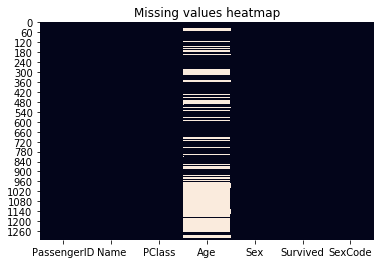

In [15]:
print(dataFrame.isnull().sum())
sns.heatmap(dataFrame.isnull(), cbar = False).set_title("Missing values heatmap") 
print(dataFrame.nunique())

dataFrame

In [ ]:
data_inputs = dataFrame
titanic = data_inputs.dropna()
#print(heart.Ca.median())
heart.Ca[heart.Ca.isnull()] = heart.Ca.median()
heart.Thal[heart.Thal == ""] = "normal"
#print(heart.isnull().sum())
sns.heatmap(heart.isnull(), cbar = False).set_title("Missing values heatmap") 

heart

# Chapter 1

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Titanic.csv', sep=',', quotechar='"')

In [4]:
df.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
PassengerID    1313 non-null int64
Name           1313 non-null object
PClass         1313 non-null object
Age            756 non-null float64
Sex            1313 non-null object
Survived       1313 non-null int64
SexCode        1313 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [6]:
survived = df.loc[:, 'Survived'].values
sex = df.loc[:, 'SexCode'].values
pclass = df.loc[:, 'PClass'].values

In [9]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [14]:
plt.style.use('seaborn-dark')

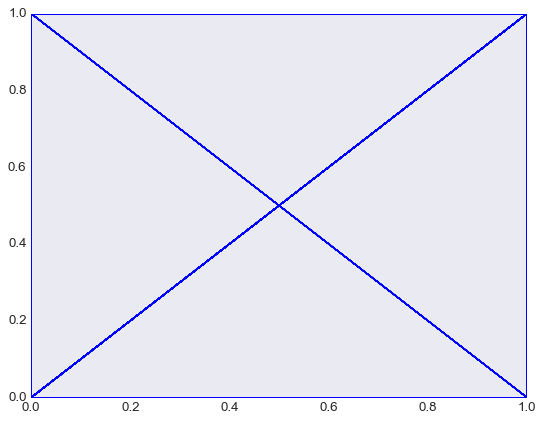

In [15]:
plt.plot(survived, sex)